# Behaviour Cloning

Train a Neural Network to drive a car.

This time I use transfer learning to do feature extraction.

## Feature Extraction using Transfer Learning
To extract features from all images.

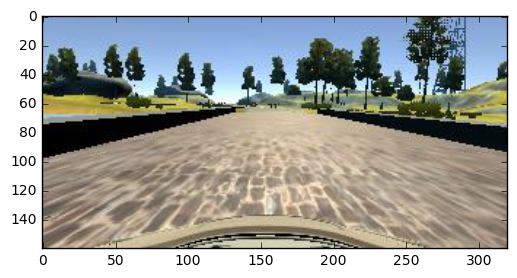

In [2]:
'''import the libs and load the test image'''
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

image=mpimg.imread("test_image.jpg")
plt.imshow(image)

In [2]:
image.shape

(160, 320, 3)

In [25]:
'''import the libs for machine learning'''
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.cross_validation import train_test_split

In [5]:
ImgSize=(320,160)

In [6]:
# TODO: preprocess the image.
# Crop+Resize
# Then flip for training as augmentation
def preprocess(img, flip=False):
    global ImgSize
    '''
    parameters:
    img: a img matrix
    '''
    # TODO: resize
    img = cv2.resize(img,(ImgSize[0],ImgSize[1]))
    # TODO: crop
    height = img.shape[0]
    img = img[height/4:height,:]
    
    # Flip
    if flip:
        img = cv2.flip(img,1)
    
    # Normalization
    img = img/127.5 - 1
        
    
    return img
    
    

In [9]:
preprocessed=preprocess(image)

/Users/jhsiao/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
preprocessed.max()

1.0

/Users/jhsiao/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


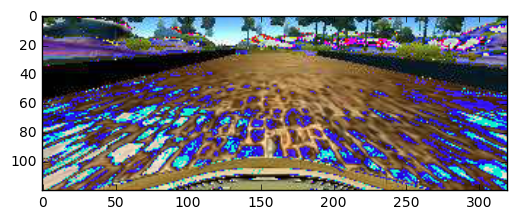

In [7]:
plt.imshow()

In [6]:
# TODO: preprocess pipelines
def read_and_prep(filename):
    img = plt.imread("data/"+filename)
    return preprocess(img)

def read_prep_flip(filename):
    img = plt.imread("data/"+filename)
    return preprocess(img,True)

## Process Training&Testing Data

Create a generator for training and testing the neural network.

In [7]:
'''read the dataset'''
import pandas as pd
data=pd.read_csv("data/driving_log.csv")

In [8]:
'''fix the bug of record dataframe that the 1st char of filename is space'''
def record_fix(filename):
    if isinstance(filename,str):
        if filename[0]==" ":
            return filename[1:]
    return filename
        

In [9]:
'''fix them'''
data=data.applymap(record_fix)

In [10]:
# TODO: make a better generator, including image preprocess,
# and ensure that image features extracted are consistent.

# When using left or right, +/- 0.25
# Note: this idea came from vivek

def data_preprocess(X,y):
    '''
    parameters:
    X,y: in arrays
    '''
    # TODO:apply
    X_orig = np.stack(X.apply(read_and_prep).values)
    X_flip = np.stack(X.apply(read_prep_flip).values)
    y = y.values
    
    X_all = np.vstack([X_orig,X_flip])
    y_all = np.hstack([y,-y])
    
    return X_all,y_all


def generator(data):
    global Batch_size
    i = 0 #init the index
    while 1:
        if i+Batch_size>data.shape[0]: # if go beyound, return to 0
            i = 0
        
        part = data.iloc[i:i+Batch_size,:]
        
        # TODO: to array
        X_center=part["center"]
        X_left=part["left"]
        X_right=part["right"]
        
        y_center=part["steering"]
        y_left=y_center+0.25
        y_right=y_center-0.25
        
        
        # TODO: center image getting out with flip
        yield data_preprocess(X_center,y_center)

        # TODO: left img gettin out with flip
        yield data_preprocess(X_left,y_left)

        # TODO: right img gettin out with flip
        yield data_preprocess(X_right,y_right)
    
    
    


## Train the output linear regression unit

In [11]:
'''# train test split'''
train,test=train_test_split(data,test_size=0.2,random_state=2016)

In [12]:
# test the tts
train.head()

,center,left,right,steering,throttle,brake,speed
3838,IMG/center_2016_12_01_13_39_07_281.jpg,IMG/left_2016_12_01_13_39_07_281.jpg,IMG/right_2016_12_01_13_39_07_281.jpg,0.195719,0.389912,0.0,18.99073
2560,IMG/center_2016_12_01_13_36_57_767.jpg,IMG/left_2016_12_01_13_36_57_767.jpg,IMG/right_2016_12_01_13_36_57_767.jpg,0.157445,0.985533,0.0,30.18149
5570,IMG/center_2016_12_01_13_42_31_741.jpg,IMG/left_2016_12_01_13_42_31_741.jpg,IMG/right_2016_12_01_13_42_31_741.jpg,0.000000,0.985533,0.0,30.18665
6140,IMG/center_2016_12_01_13_43_29_523.jpg,IMG/left_2016_12_01_13_43_29_523.jpg,IMG/right_2016_12_01_13_43_29_523.jpg,0.000000,0.985533,0.0,30.18664
3354,IMG/center_2016_12_01_13_38_18_206.jpg,IMG/left_2016_12_01_13_38_18_206.jpg,IMG/right_2016_12_01_13_38_18_206.jpg,0.128740,0.985533,0.0,30.18384


In [13]:
test.head()

,center,left,right,steering,throttle,brake,speed
4365,IMG/center_2016_12_01_13_40_00_721.jpg,IMG/left_2016_12_01_13_40_00_721.jpg,IMG/right_2016_12_01_13_40_00_721.jpg,0.00000,0.985533,0.0,30.186540
60,IMG/center_2016_12_01_13_32_44_368.jpg,IMG/left_2016_12_01_13_32_44_368.jpg,IMG/right_2016_12_01_13_32_44_368.jpg,0.00000,0.985533,0.0,12.316180
18,IMG/center_2016_12_01_13_31_14_602.jpg,IMG/left_2016_12_01_13_31_14_602.jpg,IMG/right_2016_12_01_13_31_14_602.jpg,0.00000,0.000000,0.0,1.230361
7071,IMG/center_2016_12_01_13_45_03_987.jpg,IMG/left_2016_12_01_13_45_03_987.jpg,IMG/right_2016_12_01_13_45_03_987.jpg,0.00000,0.985533,0.0,30.186630
1033,IMG/center_2016_12_01_13_34_22_936.jpg,IMG/left_2016_12_01_13_34_22_936.jpg,IMG/right_2016_12_01_13_34_22_936.jpg,0.06176,0.985533,0.0,30.186580


In [23]:
'''# import useful libs for modeling and training'''
from keras.models import Sequential,Model
from keras.layers import Input

In [ ]:
# TODO: 2 hidden layer regression model
def two_hidden_inception_large():
    img_input = Input(shape=(ImgSize[1]*0.75,ImgSize[0],3))
    base = InceptionV3(weights="imagenet",input_tensor=img_input,include_top=False)
    flatten = Flatten()(base.output)
    flatten_dropout = Dropout(0.5)(flatten)
    fc1 = Dense(1024,activation="relu")(flatten_dropout)
    fc1_dropout = Dropout(0.5)(fc1)
    fc2 = Dense(512,activation="relu")(fc1_dropout)
    fc2_dropout = Dropout(0.5)(fc2)
    steer = Dense(1)(fc2_dropout)
    
    model = Model(input=base.input,output=steer)
    model.compile("adam","mse")
    
    return model

In [36]:
# TODO: 2 hidden layer regression model
def two_hidden_inception():
    img_input = Input(shape=(ImgSize[1]*0.75,ImgSize[0],3))
    base = InceptionV3(weights="imagenet",input_tensor=img_input,include_top=False)
    flatten = Flatten()(base.output)
    flatten_dropout = Dropout(0.5)(flatten)
    fc1 = Dense(128,activation="relu")(flatten_dropout)
    fc1_dropout = Dropout(0.75)(fc1)
    fc2 = Dense(64,activation="relu")(fc1_dropout)
    fc2_dropout = Dropout(0.75)(fc2)
    steer = Dense(1)(fc2_dropout)
    
    model = Model(input=base.input,output=steer)
    model.compile("adam","mse")
    
    return model
    

In [ ]:
def two_hidden_vgg():
    img_input = Input(shape=(ImgSize[1]*0.75,ImgSize[0],3))
    base = VGG16(weights="imagenet",input_tensor=img_input,include_top=False)
    flatten = Flatten()(base.output)
    flatten_dropout = Dropout(0.5)(flatten)
    fc1 = Dense(256,activation="relu")(flatten_dropout)
    fc1_dropout = Dropout(0.5)(fc1)
    fc2 = Dense(128,activation="relu")(fc1_dropout)
    fc2_dropout = Dropout(0.75)(fc2)
    steer = Dense(1)(fc2_dropout)
    
    model = Model(input=base.input,output=steer)
    model.compile("adam","mse")
    
    return model


In [ ]:
model_large = two_hidden_inception_large()
model_inception = two_hidden_inception()
model_vgg = two_hidden_vgg()

In [35]:
'''# parameters'''
Samples_per_iter=15000 # TOTUNE
Num_val_samples=256 # TOTUNE
Iters=8
Batch_size=16

In [17]:
'''training function'''
def training(model,train_data):
    global test #testing dataset
    model.fit_generator(
        generator(train_data), 
        nb_epoch=Iters,
        max_q_size=3,
        samples_per_epoch=Samples_per_iter,
        validation_data=generator(test), # use 3 for vali each time
        # TODO: change this line
        nb_val_samples=Num_val_samples
    )

In [18]:
'''evaluation'''
def evaluate(model,num_test_samples):
    global test
    return model.evaluate_generator(
                        generator=generator(test),
                        val_samples=num_test_samples)


In [ ]:
training(model_large,train)

In [ ]:
training(model_inception,train)

In [ ]:
training(model_vgg,train)

In [21]:
# evaluate regression model
evaluate(model_inception_large,1500),evaluate(model_inception,1500),evaluate(model_vgg,1500)

/Users/jhsiao/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


107.91423950195312

## Output the architecture and weights

In [ ]:
model_large.save("model_large.h5")
model_inception.save("model_inception.h5")
model_vgg.save("model_vgg.h5")